### Import Library

In [ ]:
!pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 3.7 MB/s 
     |████████████████████████████████| 7.9 MB 20.4 MB/s 
     |████████████████████████████████| 7.0 MB 26.0 MB/s 
     |████████████████████████████████| 1.5 MB 40.6 MB/s 
  Created wheel for nlp-id: filename=nlp_id-0.1.12.0-py3-none-any.whl size=8074104 sha256=2f46a3aceba8967bc5c4120a5912f978184cf1d5c029e3cb3fa48ea3c395c8d5
  Stored in directory: /root/.cache/pip/wheels/b2/50/48/da59531125bd94f48dfe66140f41d8fd8a4f04062050375013
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449922 sha256=33ee5066d2c4a67e5b6da7648f484013d2bfac4c6a0d6a958df404bd0ad91ee1
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b9afe68b06561d65845ec8ad8de99eef84357c5d3821b47d792ead3444eddcfd
  Stored i

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.0 MB/s 


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=2ecd68e5b133fc2e245a397d599af4289780e8a4ec58d23c0c017048ac4585e3
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import emoji
import re
import matplotlib.pyplot as plt
import csv
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
from nlp_id.stopword import StopWord

#**Import Data**

In [ ]:
df = pd.read_csv('/content/Data_Kotor_HargaBBM.csv', sep=",")
df

,username,content
0,GhiffariDKI,Kami mendengar dan merasa jeritanmu Tapi nga p...
1,Darwan45537622,@OposisiCerdas Hanya Peduli Proyek Kereta Cep...
2,Thavit_Amoura,BEM DAN GERAM GELAR DEMO PENOLAKAN KENAIKAN HA...
3,Irfqn_,Kebijakan ini tentu menguntungkan korporat dan...
4,duckbusterr,"Jalanan kotanya ditata rapi, tarif angkutan um..."
...,...,...
1495,Pelacur_Istana,NU Yang Dahulu Mah Saya Yakin\nNU Sekarang Mah...
1496,antosinaga,@EsTeh__28 Tapi dikasih edukasi dulu ya anak S...
1497,AgusPra17277810,@anchy_ibrahim @biglivea Memang kenaikan BBM b...
1498,BUMN_INABerdaya,"Hai Sobat BUMN , \n\n*BULOG GELONTORKAN BERAS ..."


#**Preprocessing**

### **Case Folding Dan Cleansing**

In [ ]:
def cleansing(tweet):
    # Menghapus kata RT
    t1 = re.sub('RT\s+', '', tweet)
    # Menghapus tanda @_username
    t2 = re.sub('\B@\w+', "", t1)
    # Mengubah emoji menjadi text
    t3 = emoji.demojize(t2)
    # Menghapus URL (http:// or https://)
    t4 = re.sub('(http|https):\/\/\S+', '', t3)
    # Menghapus kata Hastag "#hastag"
    t5 = re.sub('#[A-Za-z0-9]+', '', t4)
    # Mengubah menjadi huruf Kecil (Tahapan Case Folding)
    t6 = t5.lower()
    # Mengubah huruf pada kata yang berulang menjadi tunggal ('ooooooooo' menjadi 'oo')
    t7 = re.sub(r'(.)\1+', r'\1\1', t6)
    # Mengubah tanda baca yang berulang menjadi tunggal ('!!!!!!!!' menjadi '!')
    t8 = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', t7)
    # Menghapus angka dan tanda baca
    t9 = re.sub(r'[^a-zA-Z]', ' ', t8)
    return t9

In [ ]:
for i, r in df.iterrows():
    y=cleansing(r['content'])
    df.loc[i,'content']=y

df.head()

,username,content
0,GhiffariDKI,kami mendengar dan merasa jeritanmu tapi nga p...
1,Darwan45537622,hanya peduli proyek kereta cepat dan ikn pe...
2,Thavit_Amoura,bem dan geram gelar demo penolakan kenaikan ha...
3,Irfqn_,kebijakan ini tentu menguntungkan korporat dan...
4,duckbusterr,jalanan kotanya ditata rapi tarif angkutan um...


In [ ]:
df.to_csv('cleaned_hargaBBM.csv', index=False)

In [ ]:
df = pd.read_csv('/content/cleaned_harga_BBM_Label.csv', sep=";")
df

,username,Sentiment,content
0,GhiffariDKI,Negatif,kami mendengar dan merasa jeritanmu tapi nga p...
1,Darwan45537622,Negatif,hanya peduli proyek kereta cepat dan ikn pe...
2,Thavit_Amoura,Negatif,bem dan geram gelar demo penolakan kenaikan ha...
3,Irfqn_,Negatif,kebijakan ini tentu menguntungkan korporat dan...
4,duckbusterr,Netral,jalanan kotanya ditata rapi tarif angkutan um...
...,...,...,...
1495,LantasPBM,Positif,kasat lantas polres prabumulih akp muthemainah...
1496,HajarAs32215348,Negatif,partai demokrat instruksikan kadernya turun ke...
1497,KangMasroer,Positif,kabar gembira menteri esdm ada potensi harga...
1498,LantasPBM,Positif,kasat lantas polres prabumulih akp muthemainah...


### **Menghapus Baris Terduplikasi**

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

,username,Sentiment,content
0,GhiffariDKI,Negatif,kami mendengar dan merasa jeritanmu tapi nga p...
1,Darwan45537622,Negatif,hanya peduli proyek kereta cepat dan ikn pe...
2,Thavit_Amoura,Negatif,bem dan geram gelar demo penolakan kenaikan ha...
3,Irfqn_,Negatif,kebijakan ini tentu menguntungkan korporat dan...
4,duckbusterr,Netral,jalanan kotanya ditata rapi tarif angkutan um...
...,...,...,...
1478,LantasPBM,Positif,kasat lantas polres prabumulih akp muthemainah...
1479,HajarAs32215348,Negatif,partai demokrat instruksikan kadernya turun ke...
1480,KangMasroer,Positif,kabar gembira menteri esdm ada potensi harga...
1481,LantasPBM,Positif,kasat lantas polres prabumulih akp muthemainah...


##**Slang Word Standardization (Normalization)**

In [ ]:
slang_dictionary = pd.read_csv('colloquial-indonesian-lexicon.csv')
slang_dict = pd.Series(slang_dictionary['formal'].values,index=slang_dictionary['slang']).to_dict()

In [ ]:
slang_dictionary1 = pd.read_csv('kbba.txt', sep='\t')
slang_dict1 = pd.Series(slang_dictionary1['tujuan'].values, index=slang_dictionary1['7an'].to_dict())

In [ ]:
slang_dictionary2 = pd.read_csv('slangword.txt', sep=':')
slang_dict2 = pd.Series(slang_dictionary2['dan'].values, index=slang_dictionary2['&'].to_dict())

In [ ]:
slang_dictionary3 = pd.read_csv('formalizationDict.txt', sep='\t')
slang_dict3 = pd.Series(slang_dictionary3['tujuan'].values, index=slang_dictionary3['7an'].to_dict())

In [ ]:
slang_dictionary.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


In [ ]:
slang_dictionary1.head()

,7an,tujuan
0,@,di
1,ababil,abg labil
2,abis,habis
3,acc,accord
4,ad,ada


In [ ]:
slang_dictionary2.head()

,&,dan
0,+,tambah
1,/,atau
2,=,sama dengan
3,ababil,anak ingusan
4,abal2,palsu


In [ ]:
slang_dictionary3.head()

,7an,tujuan
0,@,di
1,ababil,abg labil
2,abis,habis
3,acc,accord
4,ad,ada


In [ ]:
def Slangwords(text):
    for word in text.split():
        if word in slang_dict.keys():
            text = text.replace(word, slang_dict[word])
            text = re.sub('@[\w]+','',text)
    return text

In [ ]:
def Slangwords1(text):
    for word in text.split():
        if word in slang_dict1.keys():
            text = text.replace(word, slang_dict1[word])
            text = re.sub('@[\w]+','',text)
    return text

In [ ]:
def Slangwords2(text):
    for word in text.split():
        if word in slang_dict2.keys():
            text = text.replace(word, slang_dict2[word])
            text = re.sub('@[\w]+','',text)
    return text

In [ ]:
def Slangwords3(text):
    for word in text.split():
        if word in slang_dict3.keys():
            text = text.replace(word, slang_dict3[word])
            text = re.sub('@[\w]+','',text)
    return text

In [ ]:
df['Text_Clean'] = df['content'].apply(Slangwords)
df['Text_Clean'] = df['Text_Clean'].apply(Slangwords1)
df['Text_Clean'] = df['Text_Clean'].apply(Slangwords2)
df['Text_Clean'] = df['Text_Clean'].apply(Slangwords3)
df['Text_Clean'] = df['Text_Clean'].str.replace('mendeenggakr', 'mendengar')
df['Text_Clean'] = df['Text_Clean'].str.replace('naikx', 'naiknya')
df['Text_Clean'] = df['Text_Clean'].str.replace('harenggak', 'ngga')
df['Text_Clean'] = df['Text_Clean'].str.replace('nga', 'ngga')
df['Text_Clean'] = df['Text_Clean'].str.replace('naikx', 'naiknya')
df['Text_Clean'] = df['Text_Clean'].str.replace('sleepy', 'tidur')
df['Text_Clean'] = df['Text_Clean'].str.replace('healing', 'libur')
df['Text_Clean'] = df['Text_Clean'].str.replace('face', 'wajah')
df['Text_Clean'] = df['Text_Clean'].str.replace('nggak', 'ngga')
df['Text_Clean'] = df['Text_Clean'].str.replace('mendenggar', 'mendengar')
df['Text_Clean'].head()

0    kami mendengar dan merasa jeritanmu tapi engga...
1     hanya peduli  proyek kereta cepat dan ikn  pe...
2    bem dan geram gelar demo penolakan kenaikan ha...
3    kebijakan ini tentu menguntungkan korporat dan...
4    jalanan kotanya ditata rapi  tarif angkutan um...
Name: Text_Clean, dtype: object

##**Stopword Removal**

In [ ]:
stopword = StopWord()

In [ ]:
df['Text_Clean'] = df['Text_Clean'].apply(stopword.remove_stopword)
df['Text_Clean'].head()

0    mendengar jeritanmu engga pakai menangis kader...
1    peduli proyek kereta cepat ikn pemerintah keja...
2    bem geram gelar demo penolakan kenaikan harga ...
3    kebijakan menguntungkan korporat merugikan rak...
4    jalanan kotanya ditata rapi tarif angkutan mas...
Name: Text_Clean, dtype: object

##**Stemming**

In [ ]:
# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
df['Text_Clean'] = df['Text_Clean'].apply(stemmer.stem)
df['Text_Clean'].head()

0    dengar jerit engga pakai menang kader pdemokra...
1    peduli proyek kereta cepat ikn perintah kejam ...
2     bem geram gelar demo tolak naik harga bbm tuntut
3    bijak untung korporat rugi rakyat beli bbm den...
4    jalan kota tata rapi tarif angkut massal engen...
Name: Text_Clean, dtype: object

##**Membuang Kata yang Kurang dari 3 Huruf**

In [ ]:
df['Text_Clean'] = df['Text_Clean'].str.findall('\w{3,}').str.join(' ')
df['Text_Clean'].head()

0    dengar jerit engga pakai menang kader pdemokra...
1    peduli proyek kereta cepat ikn perintah kejam ...
2     bem geram gelar demo tolak naik harga bbm tuntut
3    bijak untung korporat rugi rakyat beli bbm den...
4    jalan kota tata rapi tarif angkut massal engen...
Name: Text_Clean, dtype: object

##**Tokenization**

In [ ]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

In [ ]:
df['Text_Clean_token'] = df['Text_Clean'].apply(split_word)
df['Text_Clean_token'].head()

0    [dengar, jerit, engga, pakai, menang, kader, p...
1    [peduli, proyek, kereta, cepat, ikn, perintah,...
2    [bem, geram, gelar, demo, tolak, naik, harga, ...
3    [bijak, untung, korporat, rugi, rakyat, beli, ...
4    [jalan, kota, tata, rapi, tarif, angkut, massa...
Name: Text_Clean_token, dtype: object

In [ ]:
df

,username,Sentiment,content,Text_Clean,Text_Clean_token
0,GhiffariDKI,Negatif,kami mendengar dan merasa jeritanmu tapi nga p...,dengar jerit engga pakai menang kader pdemokra...,"[dengar, jerit, engga, pakai, menang, kader, p..."
1,Darwan45537622,Negatif,hanya peduli proyek kereta cepat dan ikn pe...,peduli proyek kereta cepat ikn perintah kejam ...,"[peduli, proyek, kereta, cepat, ikn, perintah,..."
2,Thavit_Amoura,Negatif,bem dan geram gelar demo penolakan kenaikan ha...,bem geram gelar demo tolak naik harga bbm tuntut,"[bem, geram, gelar, demo, tolak, naik, harga, ..."
3,Irfqn_,Negatif,kebijakan ini tentu menguntungkan korporat dan...,bijak untung korporat rugi rakyat beli bbm den...,"[bijak, untung, korporat, rugi, rakyat, beli, ..."
4,duckbusterr,Netral,jalanan kotanya ditata rapi tarif angkutan um...,jalan kota tata rapi tarif angkut massal engen...,"[jalan, kota, tata, rapi, tarif, angkut, massa..."
...,...,...,...,...,...
1478,LantasPBM,Positif,kasat lantas polres prabumulih akp muthemainah...,kasiat lantas polresi prabumulih akp muthemain...,"[kasiat, lantas, polresi, prabumulih, akp, mut..."
1479,HajarAs32215348,Negatif,partai demokrat instruksikan kadernya turun ke...,partai demokrat instruksi kader turun jalan ak...,"[partai, demokrat, instruksi, kader, turun, ja..."
1480,KangMasroer,Positif,kabar gembira menteri esdm ada potensi harga...,kabar gembira menteri esdm potensi harga bbm t...,"[kabar, gembira, menteri, esdm, potensi, harga..."
1481,LantasPBM,Positif,kasat lantas polres prabumulih akp muthemainah...,kasiat lantas polresi prabumulih akp muthemain...,"[kasiat, lantas, polresi, prabumulih, akp, mut..."


In [ ]:
df['Sentiment'].unique()

array(['Negatif', 'Netral', 'Positif', 'Negitif', 'negatif'], dtype=object)

In [ ]:
df['Sentiment'] = df['Sentiment'].str.replace('Negitif', 'Negatif')
df['Sentiment'] = df['Sentiment'].str.replace('negatif', 'Negatif')

In [ ]:
df['Sentiment'].unique()

array(['Negatif', 'Netral', 'Positif'], dtype=object)

In [ ]:
df.Sentiment.value_counts()

Negatif    798
Positif    550
Netral     135
Name: Sentiment, dtype: int64

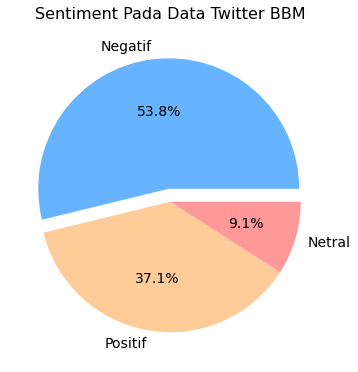

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['Sentiment'].value_counts()]
labels = list(df['Sentiment'].value_counts().index)
explode = (0.1, 0, 0)
colors = ['#66b3ff', '#ffcc99', '#ff9999']
ax.pie(x = sizes, labels = labels, colors=colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Pada Data Twitter BBM', fontsize = 16, pad = 20)
plt.show()

#**Wordcloud**

In [ ]:
negative_review = df[df['Sentiment'] == 'Negatif']
positive_review = df[df['Sentiment'] == 'Positif']

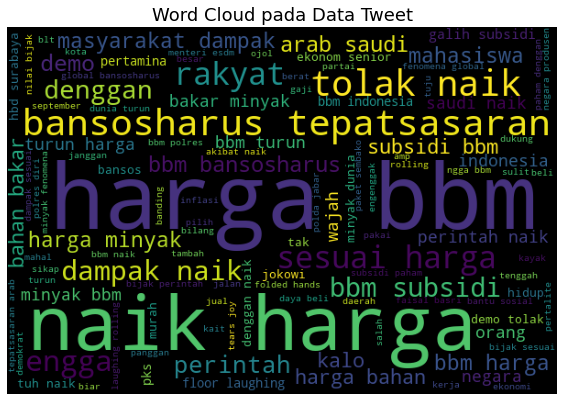

In [ ]:
from wordcloud import WordCloud
list_words=''
for review in df['Text_Clean_token']:
    for word in review:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud pada Data Tweet', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

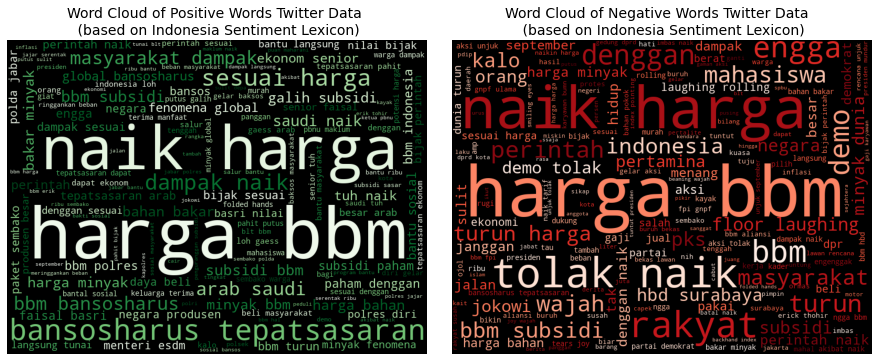

In [ ]:
positive_words = positive_review['Text_Clean_token']

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words Twitter Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

negative_words = negative_review['Text_Clean_token']

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words Twitter Data  \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

#**Modelling**

##**Membagi Data Menjadi Train dan Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['Text_Clean'],df['Sentiment'],test_size = 0.2,random_state = 42)

##**LabelEncoder dan TFIDF**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=510)
Tfidf_vect.fit(df['Text_Clean'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [ ]:
Train_X_Tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.46969016, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

##**Multinomial Naive Bayes**

In [ ]:
#klasifikasi naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(Train_X_Tfidf.toarray(), y_train)
predicted = clf.predict(Test_X_Tfidf.toarray())
print("Multinomial NB Accuracy:" , accuracy_score(y_test,predicted))
print("Multinomial NB Precison:", precision_score(y_test,predicted,average='weighted'))
print("Multinomial NB Recall :",recall_score(y_test,predicted,average='weighted'))
print("Multinomial NB F1 Score:",f1_score(y_test,predicted,average='weighted'))
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('-----------------------------------------------\n')
print(classification_report(y_test,predicted,zero_division=0))


Multinomial NB Accuracy: 0.8148148148148148
Multinomial NB Precison: 0.8307185328461923
Multinomial NB Recall : 0.8148148148148148
Multinomial NB F1 Score: 0.785921990467445
confusion matrix:
 [[151   0  13]
 [ 19   2   5]
 [ 18   0  89]]
-----------------------------------------------

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       164
           1       1.00      0.08      0.14        26
           2       0.83      0.83      0.83       107

    accuracy                           0.81       297
   macro avg       0.88      0.61      0.61       297
weighted avg       0.83      0.81      0.79       297



##**Support Vector Machine**

In [ ]:
#klasifikasi SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = LinearSVC().fit(Train_X_Tfidf.toarray(), y_train)
predicted = clf.predict(Test_X_Tfidf.toarray())
print("SVM Accuracy:" , accuracy_score(y_test,predicted))
print("SVM Precison:", precision_score(y_test,predicted,average='weighted'))
print("SVM Recall :",recall_score(y_test,predicted,average='weighted'))
print("SVM F1 Score:",f1_score(y_test,predicted,average='weighted'))
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('-----------------------------------------------\n')
print(classification_report(y_test,predicted,zero_division=0))

SVM Accuracy: 0.8249158249158249
SVM Precison: 0.8182131391433716
SVM Recall : 0.8249158249158249
SVM F1 Score: 0.8125239236350348
confusion matrix:
 [[146   3  15]
 [ 11   7   8]
 [ 15   0  92]]
-----------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       164
           1       0.70      0.27      0.39        26
           2       0.80      0.86      0.83       107

    accuracy                           0.82       297
   macro avg       0.78      0.67      0.70       297
weighted avg       0.82      0.82      0.81       297



##**Logisic Regression**

In [ ]:
#klasifikasi Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = LogisticRegression().fit(Train_X_Tfidf.toarray(), y_train)
predicted = clf.predict(Test_X_Tfidf.toarray())
print("Logistic Regression Accuracy:" , accuracy_score(y_test,predicted))
print("Logistic Regression Precison:", precision_score(y_test,predicted,average='weighted'))
print("Logistic Regression Recall :",recall_score(y_test,predicted,average='weighted'))
print("Logistic Regression F1 Score:",f1_score(y_test,predicted,average='weighted'))
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('-----------------------------------------------\n')
print(classification_report(y_test,predicted,zero_division=0))

Logistic Regression Accuracy: 0.8316498316498316
Logistic Regression Precison: 0.8333477896319427
Logistic Regression Recall : 0.8316498316498316
Logistic Regression F1 Score: 0.8152585147607418
confusion matrix:
 [[152   1  11]
 [ 13   6   7]
 [ 18   0  89]]
-----------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       164
           1       0.86      0.23      0.36        26
           2       0.83      0.83      0.83       107

    accuracy                           0.83       297
   macro avg       0.84      0.66      0.69       297
weighted avg       0.83      0.83      0.82       297



#**Ekspor Hasil Klasifikasi**

In [ ]:
Hasil_Klasifikasi = pd.DataFrame({'Data Uji':X_test,'Label Aktual':y_test,'Label Prediksi':predicted})
Hasil_Klasifikasi

,Data Uji,Label Aktual,Label Prediksi
123,ngga bbm mending turu tidur wajah engga libur ...,0,0
432,resiko pertamina sasar marah rakyat harga bbm ...,0,0
1032,ntt cap provinsi miskin ganggu denggan harga b...,2,0
529,bingung faham dprd gorontalo tolak amp lokasi ...,0,0
1416,perintah harga bbm demokrat buru kebun binatan...,0,0
...,...,...,...
1100,aksi duduk kantor dprd tasikmalaya tolak harga...,0,0
1208,kait kader gerindra notabene koalisi denggan p...,0,0
543,sikap sesuai harga bbm polda kepri gelar focus...,2,2
1471,pasca harga bbm polres sampang ratus paket sem...,2,2


In [ ]:
Hasil_Klasifikasi.to_excel('Hasil Klasifikasi.xlsx', index=False)

In [ ]:
pd.read_excel('Hasil Klasifikasi.xlsx')

,Data Uji,Label Aktual,Label Prediksi
0,ngga bbm mending turu tidur wajah engga libur ...,0,0
1,resiko pertamina sasar marah rakyat harga bbm ...,0,0
2,ntt cap provinsi miskin ganggu denggan harga b...,2,0
3,bingung faham dprd gorontalo tolak amp lokasi ...,0,0
4,perintah harga bbm demokrat buru kebun binatan...,0,0
...,...,...,...
292,aksi duduk kantor dprd tasikmalaya tolak harga...,0,0
293,kait kader gerindra notabene koalisi denggan p...,0,0
294,sikap sesuai harga bbm polda kepri gelar focus...,2,2
295,pasca harga bbm polres sampang ratus paket sem...,2,2


#**Kesimpulan Akhir**

Setelah melakukan eksperimen, dapat disimpulkan bahwa Multinomial Naive Bayes dapat melakukan klasifikasi sentimen analisis dengan akurasi sebesar 81%, precision sebesar 83%, recall sebesar 81% dan F1 Scrore sebesar 79%. Preprocessing pada eksperimen ini meliputi proses case folding, cleansing, menghapus dupilkat, normalization, stopword, stemming dan tokenization.